# Problem Statement : To predict diabetes on basis of features of daibetes dataset

## 1.Import Libraries

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 2.Data Collection

In [254]:
df = pd.read_csv('E:/ML_Datasets/diabetes.csv')

In [255]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## check data is balanced or not

In [256]:
df1 = df['Outcome'].value_counts()

In [257]:
df1

0    500
1    268
Name: Outcome, dtype: int64

## count Plot for checking data is balanced or not

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

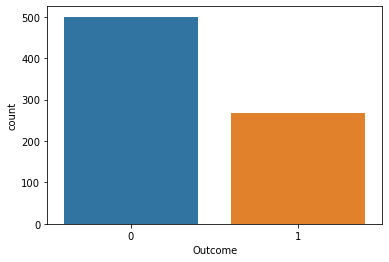

In [258]:
sns.countplot(df['Outcome'])

## Here data is not balanced so we explicitely balanced the data .Here we do oversampling . Means minority class has increase copies

## This is oversampling . increase copies of minority classes

In [259]:
from sklearn.utils import resample

df_minority = df[df['Outcome']==1]
df_majority = df[df['Outcome']==0]


df_minority_upsample = resample(df_minority ,replace = True ,  n_samples = 500 , random_state = 42)


df_upsample = pd.concat([df_majority , df_minority_upsample])

In [260]:
#sns.countplot(df_upsample)
df_upsample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
612,7,168,88,42,321,38.2,0.787,40,1
586,8,143,66,0,0,34.9,0.129,41,1
730,3,130,78,23,79,28.4,0.323,34,1
664,6,115,60,39,0,33.7,0.245,40,1


C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

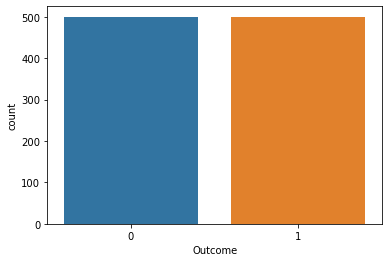

In [261]:
sns.countplot(df_upsample['Outcome'])

## Now data is balanced

## Here we check outliers

In [262]:
df1 = pd.DataFrame(df_upsample)

<AxesSubplot:>

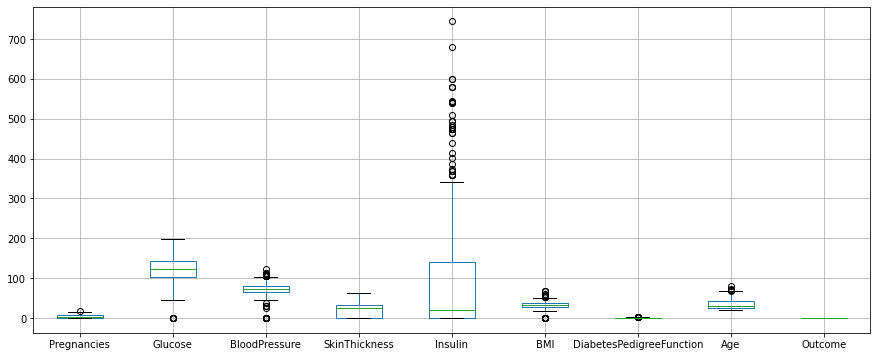

In [263]:
plt.figure(figsize = (15,6))
df1.boxplot()

In [264]:
#df_upsample['Insulin'].drop(df_upsample['Insulin']>340 , axis = 0  , inplace = True )

In [265]:
df_upsample.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0


In [266]:
x = df_upsample.iloc[:,:-1]
y = pd.DataFrame(df_upsample.iloc[:,-1])

In [267]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21


In [268]:
y.head(2)

,Outcome
1,0
3,0


## Data split into dependent and independent variable for RandomForest model

In [269]:
x_train ,x_test ,y_train ,y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

## Import RandomForestClassifier for permutation feature importance importance

In [270]:
from sklearn.ensemble import RandomForestClassifier

In [271]:
model = RandomForestClassifier(n_estimators = 100 , random_state = 42)

In [272]:
model.fit(x_train , y_train)

C:\Users\Pritam\AppData\Local\Temp/ipykernel_1388/1964293123.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train , y_train)


RandomForestClassifier(random_state=42)

## This is the score of feature importance

In [273]:
model.feature_importances_

array([0.08438164, 0.25954326, 0.08599272, 0.07254184, 0.068935  ,
       0.17526916, 0.11285991, 0.14047647])

## Create a dataframe of featureimportance score with feature of dataset

In [274]:
results = pd.DataFrame(model.feature_importances_ , x.columns , columns =(['Feature_importance_score']))
#results.append(x.columns)
#results.append(model.feature_importances_)

In [275]:
results = pd.DataFrame(results)
results

,Feature_importance_score
Pregnancies,0.084382
Glucose,0.259543
BloodPressure,0.085993
SkinThickness,0.072542
Insulin,0.068935
BMI,0.175269
DiabetesPedigreeFunction,0.112860
Age,0.140476


## Feature Importance Plot

Text(0, 0.5, 'score of feature importance')

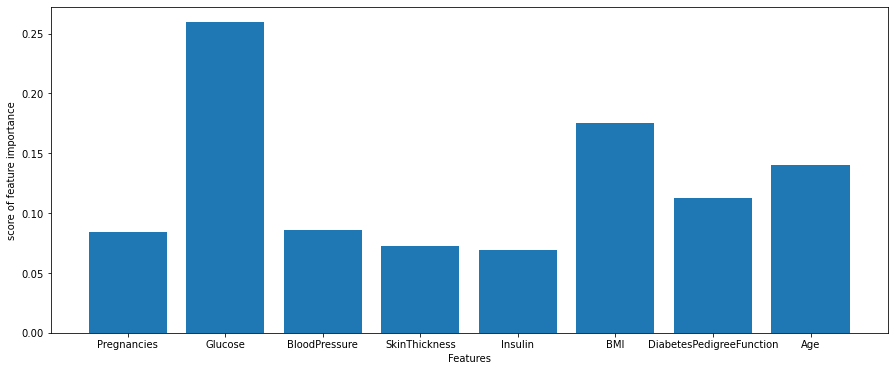

In [276]:
plt.figure(figsize = (15,6))
plt.bar(x.columns,model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('score of feature importance')

## Data split into dependent and independent variable for logistic model

In [277]:
X = df_upsample.loc[:,['Glucose','BMI','DiabetesPedigreeFunction','Age']]
Y = pd.DataFrame (df_upsample.iloc[:,-1])

In [278]:
X.head(2)

,Glucose,BMI,DiabetesPedigreeFunction,Age
1,85,26.6,0.351,31
3,89,28.1,0.167,21


In [279]:
Y.head(2)

,Outcome
1,0
3,0


## Data splitted into train and test for logistic model

In [280]:
X_train ,X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 42)

In [281]:
from sklearn.linear_model import LogisticRegression

In [282]:
model1 = LogisticRegression()

## Fit model

In [283]:
model1.fit(X_train ,Y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

## prediction_output

In [284]:
Y_pred = model1.predict(X_test)

In [285]:
Y_pred = pd.DataFrame(Y_pred ,columns ={'prediction_output'})

In [286]:
Y_pred

,prediction_output
0,0
1,1
2,1
3,0
4,0
...,...
195,0
196,1
197,0
198,1


# Performance Matrix or Cost Function or Evaluation Matrix or Loss Function

In [287]:
from sklearn.metrics import confusion_matrix , classification_report

## confusion_matrix

In [288]:
print(confusion_matrix(Y_test , Y_pred))

[[75 21]
 [25 79]]


## Classification_report

In [289]:
print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        96
           1       0.79      0.76      0.77       104

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200

